In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

from importlib.util import find_spec
if find_spec("qml_hep_lhc") is None:
    import sys
    sys.path.append('..')

In [3]:
from qml_hep_lhc.data import ElectronPhoton, MNIST, QuarkGluon
import argparse
from sklearn.decomposition import PCA
import numpy as np
from skimage.filters import threshold_local

In [25]:
def display_data(data,cmap = 'viridis'):
    fig = plt.figure(figsize=(10, 7))
    rows = 2
    columns = 2
    index = [np.where(data.y_train == 1)[0], np.where(data.y_train == 0)[0]] # 0, 1
    for i in range(columns):
        fig.add_subplot(rows, columns,i+1)
        plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis = 0), cmap=cmap)
        plt.title(data.classes[i])
        plt.colorbar()

## Mnist

Binarizing data...
Binarizing data...

Dataset :MNIST
╒════════╤════════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size         │ Test size         │ Dims        │
╞════════╪════════════════════╪═══════════════════╪═════════════╡
│ X      │ (11923, 28, 28, 1) │ (1980, 28, 28, 1) │ (28, 28, 1) │
├────────┼────────────────────┼───────────────────┼─────────────┤
│ y      │ (11923,)           │ (1980,)           │ (1,)        │
╘════════╧════════════════════╧═══════════════════╧═════════════╛

╒══════════════╤═══════╤═══════╤════════╤═══════╤══════════════════════════╕
│ Type         │   Min │   Max │   Mean │   Std │ Samples for each class   │
╞══════════════╪═══════╪═══════╪════════╪═══════╪══════════════════════════╡
│ Train Images │     0 │   255 │  31.76 │ 77.59 │ [6000, 5923]             │
├──────────────┼───────┼───────┼────────┼───────┼──────────────────────────┤
│ Train Labels │     0 │     1 │   0.5  │  0.5  │                          │
├──────────────┼─────

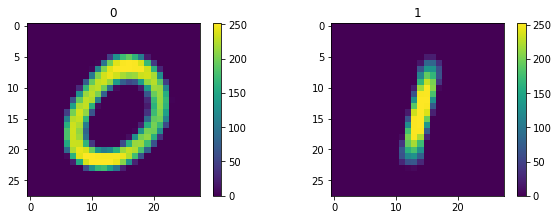

In [26]:
args = argparse.Namespace()
args.binary_data = [0,1]

data = MNIST(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Binarizing data...
Binarizing data...
Center cropping...
Center cropping...

Dataset :MNIST
╒════════╤════════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size         │ Test size         │ Dims        │
╞════════╪════════════════════╪═══════════════════╪═════════════╡
│ X      │ (11923, 20, 20, 1) │ (1980, 20, 20, 1) │ (20, 20, 1) │
├────────┼────────────────────┼───────────────────┼─────────────┤
│ y      │ (11923,)           │ (1980,)           │ (1,)        │
╘════════╧════════════════════╧═══════════════════╧═════════════╛

╒══════════════╤═══════╤═══════╤════════╤═══════╤══════════════════════════╕
│ Type         │   Min │   Max │   Mean │   Std │ Samples for each class   │
╞══════════════╪═══════╪═══════╪════════╪═══════╪══════════════════════════╡
│ Train Images │     0 │   255 │  61.38 │ 99.21 │ [6000, 5923]             │
├──────────────┼───────┼───────┼────────┼───────┼──────────────────────────┤
│ Train Labels │     0 │     1 │   0.5  │  0.5  │           

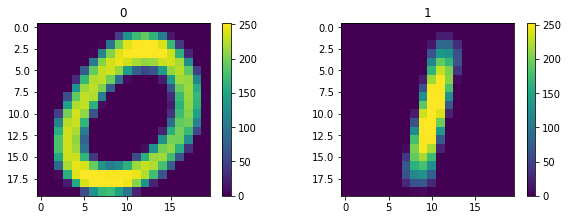

In [27]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.center_crop = 0.7

data = MNIST(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

In [28]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(11923, 400)

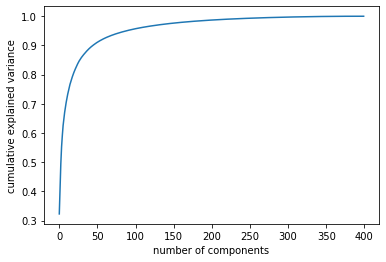

In [29]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Binarizing data...
Binarizing data...
Center cropping...
Center cropping...
Performing PCA on data...
Cumulative sum on train : 95.65441566150525
Cumulative sum on test: 95.65441566150525

Dataset :MNIST
╒════════╤════════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size         │ Test size         │ Dims        │
╞════════╪════════════════════╪═══════════════════╪═════════════╡
│ X      │ (11923, 10, 10, 1) │ (1980, 10, 10, 1) │ (10, 10, 1) │
├────────┼────────────────────┼───────────────────┼─────────────┤
│ y      │ (11923,)           │ (1980,)           │ (1,)        │
╘════════╧════════════════════╧═══════════════════╧═════════════╛

╒══════════════╤══════════╤═════════╤════════╤════════╤══════════════════════════╕
│ Type         │      Min │     Max │   Mean │    Std │ Samples for each class   │
╞══════════════╪══════════╪═════════╪════════╪════════╪══════════════════════════╡
│ Train Images │ -1316.62 │ 2245.03 │   0    │ 175.5  │ [6000, 5923]             │
├

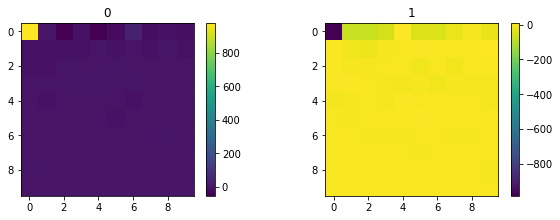

In [30]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.center_crop = 0.7
args.pca = 100

data = MNIST(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Binarizing data...
Binarizing data...
Center cropping...
Center cropping...
Resizing data...
Resizing data...

Dataset :MNIST
╒════════╤══════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size       │ Test size       │ Dims      │
╞════════╪══════════════════╪═════════════════╪═══════════╡
│ X      │ (11923, 8, 8, 1) │ (1980, 8, 8, 1) │ (8, 8, 1) │
├────────┼──────────────────┼─────────────────┼───────────┤
│ y      │ (11923,)         │ (1980,)         │ (1,)      │
╘════════╧══════════════════╧═════════════════╧═══════════╛

╒══════════════╤═══════╤═══════╤════════╤═══════╤══════════════════════════╕
│ Type         │   Min │   Max │   Mean │   Std │ Samples for each class   │
╞══════════════╪═══════╪═══════╪════════╪═══════╪══════════════════════════╡
│ Train Images │     0 │   255 │  61.9  │  92.3 │ [6000, 5923]             │
├──────────────┼───────┼───────┼────────┼───────┼──────────────────────────┤
│ Train Labels │     0 │     1 │   0.5  │   0.5 │                   

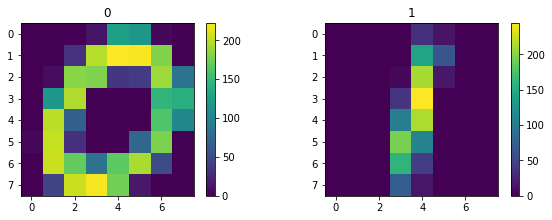

In [31]:
args = argparse.Namespace()
args.binary_data = [0,1]
args.center_crop = 0.7
args.resize = [8,8]

data = MNIST(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

## Electron Photon

Center cropping...
Center cropping...

Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

╒══════════════╤═══════╤═══════╤════════╤═══════╤══════════════════════════╕
│ Type         │   Min │   Max │   Mean │   Std │ Samples for each class   │
╞══════════════╪═══════╪═══════╪════════╪═══════╪══════════════════════════╡
│ Train Images │     0 │  1.47 │   0.02 │  0.09 │ [4500, 4500]             │
├──────────────┼───────┼───────┼────────┼───────┼──────────────────────────┤
│ Train Labels │     0 │  1    │   0.5  │  0.5  │                          │
├──────────────┼───────┼───────┼────────┼───────┼───────

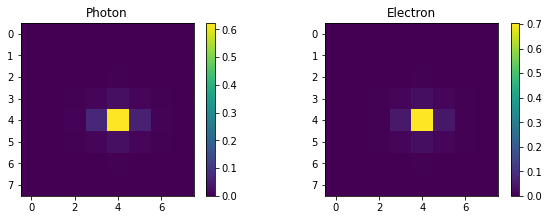

In [33]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2

data = ElectronPhoton(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

In [7]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(9000, 64)

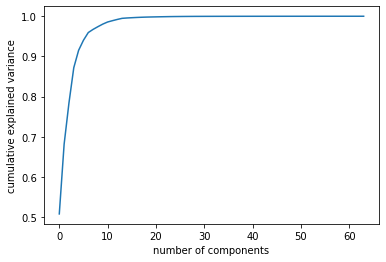

In [8]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Center cropping...
Center cropping...
Performing PCA on data...
Cumulative sum on train : 99.634186
Cumulative sum on test: 99.634186
Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 4, 4, 1) │ (1000, 4, 4, 1) │ (4, 4, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: -0.69
Max: 0.81
Mean: 0.00
Std: 0.08
Train labels stats
Min: 0.00
Max: 1.00



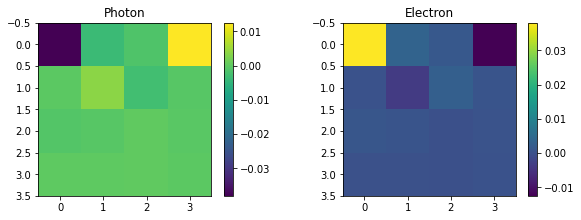

In [64]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2
args.pca = 16

data = ElectronPhoton(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Center cropping...
Center cropping...
Performing graph convolution...
Performing graph convolution...
Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: 0.00
Max: 1.79
Mean: 0.88
Std: 0.20
Train labels stats
Min: 0.00
Max: 1.00



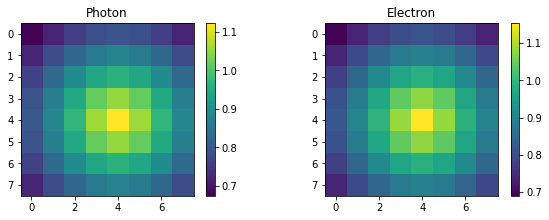

In [65]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2
args.graph_conv = 1

data = ElectronPhoton(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

## Quark Gluon

Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 39, 39, 1) │ (1000, 39, 39, 1) │ (39, 39, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 7.09
Mean: 0.00
Std: 0.01
Train labels stats
Min: 0.00
Max: 1.00



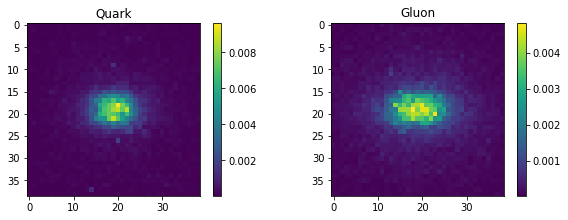

In [71]:
args = argparse.Namespace()

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

In [72]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(9000, 1521)

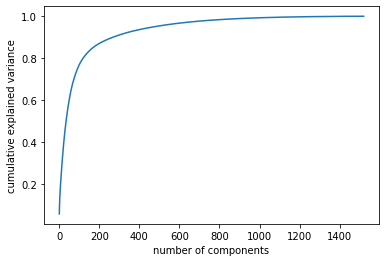

In [73]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Performing PCA on data...
Cumulative sum on train : 89.45578
Cumulative sum on test: 89.45578
Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 16, 16, 1) │ (1000, 16, 16, 1) │ (16, 16, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: -0.79
Max: 9.86
Mean: 0.00
Std: 0.03
Train labels stats
Min: 0.00
Max: 1.00



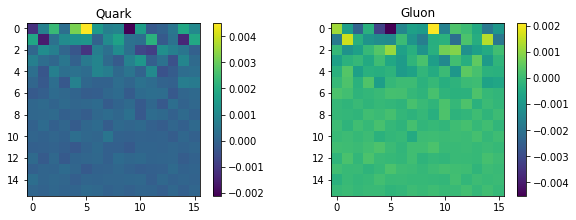

In [75]:
args = argparse.Namespace()
args.pca = 256

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Resizing data...
Resizing data...
Dataset :Quark Gluon
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: 0.00
Max: 1.00
Mean: 0.00
Std: 0.01
Train labels stats
Min: 0.00
Max: 1.00



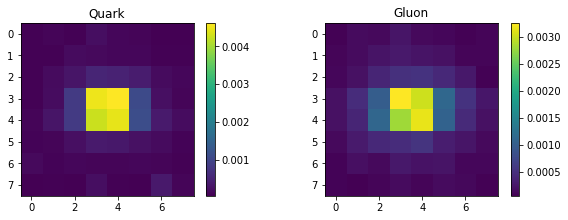

In [77]:
args = argparse.Namespace()
args.resize = [8,8]

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Resizing data...
Resizing data...
Performing graph convolution...
Performing graph convolution...
Dataset :Quark Gluon
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: 0.00
Max: 1.01
Mean: 0.02
Std: 0.03
Train labels stats
Min: 0.00
Max: 1.00



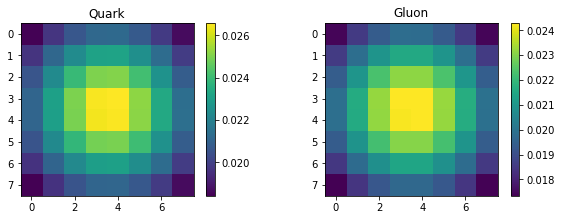

In [80]:
args = argparse.Namespace()
args.resize = [8,8]
args.graph_conv = 1

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Resizing data...
Resizing data...
Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 10, 10, 1) │ (1000, 10, 10, 1) │ (10, 10, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 1.37
Mean: 0.00
Std: 0.01
Train labels stats
Min: 0.00
Max: 1.00



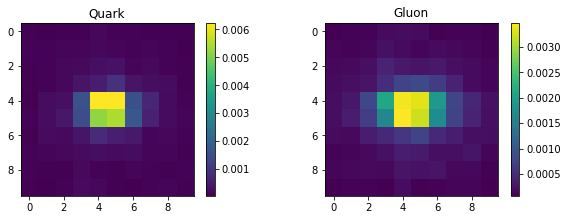

In [81]:
args = argparse.Namespace()
args.resize = [10,10]

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

Resizing data...
Resizing data...
Performing graph convolution...
Performing graph convolution...
Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 10, 10, 1) │ (1000, 10, 10, 1) │ (10, 10, 1) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 1.38
Mean: 0.03
Std: 0.06
Train labels stats
Min: 0.00
Max: 1.00



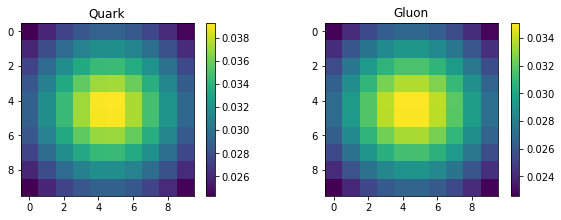

In [82]:
args = argparse.Namespace()
args.resize = [10,10]
args.graph_conv = 1

data = QuarkGluon(args)
data.prepare_data()
data.setup()
print(data)
display_data(data)

In [ ]:
ss